# <center> Elementy numerycznej algebry liniowej </center>

Rozwiązywanie układów równań liniowych jest jednym z podstawowych problemów metod numerycznych. Układy równań liniowych występują w wielu dziedzinach nauki i inżynierii. Stosuje się też w uczeniu maszynowym np. podczas regresji z błędem średniokwadratowym. 


Istnieje kilka metod rozwiązywania układów równań. Na dzisiejszych zajęciach zajmiemy się:
* eliminacją Gaussa bez oraz z wyborem elementu głównego,
* metodami iteracyjnymi.

Problem rozwiązywania układu równań liniowych będzie nam towarzyszły do końca zajęć z tego przedmiotu.

## Normy i wskaźniki uwarunkowania

Wrażliwość układu (zmiana rozwiązania) na niewielkie zaburzenia wektora `b` zależy od macierzy `A` i ocenia się ja za pomocą tzw. współczynnika lub [wskaźnika uwarunkowania macierzy](https://pl.wikipedia.org/wiki/Wskaźnik_uwarunkowania) (ang. *condition number*). Im wyższa wartość tego wskaźnika. tym macierz jest gorzej uwarunkowana. Wskaźnik uwarunkowania to iloczyn normy macierzy z normą jej odwrotności.

$$cond(A)=|A|_{p}\cdot|A^{-1}|_{p}$$
gdzie *p* oznacza jedną z norm macierzy.

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

***Zadanie 1.***

Porównaj normy 1,2, $\infty$ następujących macierzy:
* [Hilberta](https://pl.wikipedia.org/wiki/Macierz_Hilberta): o wymiarach 5x5 i 15x15
* [Vandermonde'a](https://pl.wikipedia.org/wiki/Macierz_Vandermonde’a): o wymiarach 5x5 i 15x15
* losowej o wartościach z przedziału [0,1]:  o wymiarach 5x5 i 15x15
* $P=\left[\begin{array}{cccc}4 & 1 & -1 & 0 \\ 1 & 3 & -1 & 0 \\ -1 & -1 & 5 & 2 \\ 0 & 0 & 2 & 4\end{array}\right]$

Czy wśród powyższych macierzy jest macierz [diagonalnie dominująca](https://pl.wikipedia.org/wiki/Macierz_przekątniowo_dominująca)?


In [5]:
import numpy as np

def hilbert_matrix(n):

    return np.fromfunction(lambda i, j: 1.0 / (i + j + 1), (n, n))

def vandermonde_matrix(n):

    x = np.arange(1, n + 1)
    return np.vander(x, N=n, increasing=True)

def random_matrix(n):

    return np.random.rand(n, n)

def matrix_norms(A):

    norm_1 = np.linalg.norm(A, 1)
    norm_inf = np.linalg.norm(A, np.inf)
    norm_2 = np.linalg.norm(A, 2)
    return norm_1, norm_inf, norm_2

def is_diagonally_dominant(A, strict=False):

    n = A.shape[0]
    diag_abs = np.abs(np.diag(A))
    off_diag_sum = np.sum(np.abs(A), axis=1) - diag_abs
    if strict:
        return np.all(diag_abs > off_diag_sum)
    else:
        return np.all(diag_abs >= off_diag_sum)

def print_matrix_norms(A, name):

    norm_1, norm_inf, norm_2 = matrix_norms(A)
    print(f"Macierz {name}:")
    print(A)
    print("Norma 1       :", norm_1)
    print("Norma inf     :", norm_inf)
    print("Norma 2       :", norm_2)
    print("Przekątniowo dominująca? ", "Tak" if is_diagonally_dominant(A) else "Nie")
    print("-" * 50)

def main():

    np.set_printoptions(precision=4, suppress=True)
    

    H5 = hilbert_matrix(5)
    H15 = hilbert_matrix(15)
    print_matrix_norms(H5, "Hilbert 5x5")
    print_matrix_norms(H15, "Hilbert 15x15")
    

    V5 = vandermonde_matrix(5)
    V15 = vandermonde_matrix(15)
    print_matrix_norms(V5, "Vandermonde 5x5")
   
    norm1, norm_inf, norm2 = matrix_norms(V15)
    print("Macierz Vandermonde 15x15:")
    print(f"Norma 1       : {norm1}")
    print(f"Norma inf     : {norm_inf}")
    print(f"Norma 2       : {norm2}")
    print("Przekątniowo dominująca? ", "Tak" if is_diagonally_dominant(V15) else "Nie")
    print("-" * 50)
    
    np.random.seed(0)
    R5 = random_matrix(5)
    R15 = random_matrix(15)
    print_matrix_norms(R5, "Losowa 5x5")
    norm1, norm_inf, norm2 = matrix_norms(R15)
    print("Macierz losowa 15x15:")
    print(f"Norma 1       : {norm1}")
    print(f"Norma inf     : {norm_inf}")
    print(f"Norma 2       : {norm2}")
    print("Przekątniowo dominująca? ", "Tak" if is_diagonally_dominant(R15) else "Nie")
    print("-" * 50)
    
    # 4. Macierz P
    P = np.array([
        [4,  1, -1, 0],
        [1,  3, -1, 0],
        [-1, -1, 5, 2],
        [0,  0,  2, 4]
    ], dtype=float)
    print_matrix_norms(P, "P 4x4")

if __name__ == "__main__":
    main()


Macierz Hilbert 5x5:
[[1.     0.5    0.3333 0.25   0.2   ]
 [0.5    0.3333 0.25   0.2    0.1667]
 [0.3333 0.25   0.2    0.1667 0.1429]
 [0.25   0.2    0.1667 0.1429 0.125 ]
 [0.2    0.1667 0.1429 0.125  0.1111]]
Norma 1       : 2.283333333333333
Norma inf     : 2.283333333333333
Norma 2       : 1.567050691098231
Przekątniowo dominująca?  Nie
--------------------------------------------------
Macierz Hilbert 15x15:
[[1.     0.5    0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1
  0.0909 0.0833 0.0769 0.0714 0.0667]
 [0.5    0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909
  0.0833 0.0769 0.0714 0.0667 0.0625]
 [0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833
  0.0769 0.0714 0.0667 0.0625 0.0588]
 [0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769
  0.0714 0.0667 0.0625 0.0588 0.0556]
 [0.2    0.1667 0.1429 0.125  0.1111 0.1    0.0909 0.0833 0.0769 0.0714
  0.0667 0.0625 0.0588 0.0556 0.0526]
 [0.1667 0.1429 0.125  0.1111 0.1  

*Wskazówka: Do wyznaczenia norm możesz wykorzystać funkcję `numpy.linalg.norm`*

***Zadanie 2.***

Oblicz wskaźniki uwarunkowania macierzy z poprzedniego zadania.

*Wskazówka: Możesz wykorzystać funkcję `numpy.linalg.cond`.*

In [6]:
# zrobione wyżej
def print_condition_number(A, name, norm_type='2-norm'):
    cond_val = np.linalg.cond(A)
    print(f"Macierz {name} (warunek, norma {norm_type}): {cond_val:.4e}")
def main():
    # Ustawienia wyświetlania dla czytelności.
    np.set_printoptions(precision=4, suppress=True)
    
    print("Obliczanie wskaźników uwarunkowania (liczb uwarunkowania) macierzy:")
    print("="*70)
    
    # 1. Macierz Hilberta 5x5 i 15x15
    H5 = hilbert_matrix(5)
    H15 = hilbert_matrix(15)
    print_condition_number(H5, "Hilbert 5x5")
    print_condition_number(H15, "Hilbert 15x15")
    print("-"*70)
    
    # 2. Macierz Vandermonde’a 5x5 i 15x15
    V5 = vandermonde_matrix(5)
    V15 = vandermonde_matrix(15)
    print_condition_number(V5, "Vandermonde 5x5")
    print_condition_number(V15, "Vandermonde 15x15")
    print("-"*70)
    
    # 3. Macierz losowa: 5x5 oraz 15x15
    # Ustawiamy ziarno, aby wyniki były powtarzalne.
    np.random.seed(0)
    R5 = random_matrix(5)
    R15 = random_matrix(15)
    print_condition_number(R5, "Losowa 5x5")
    print_condition_number(R15, "Losowa 15x15")
    print("-"*70)
    
    # 4. Macierz P
    P = np.array([
        [4,  1, -1, 0],
        [1,  3, -1, 0],
        [-1, -1, 5, 2],
        [0,  0,  2, 4]
    ], dtype=float)
    print_condition_number(P, "P 4x4")
    
if __name__ == "__main__":
    main()


Obliczanie wskaźników uwarunkowania (liczb uwarunkowania) macierzy:
Macierz Hilbert 5x5 (warunek, norma 2-norm): 4.7661e+05
Macierz Hilbert 15x15 (warunek, norma 2-norm): 3.1916e+17
----------------------------------------------------------------------
Macierz Vandermonde 5x5 (warunek, norma 2-norm): 2.6170e+04
Macierz Vandermonde 15x15 (warunek, norma 2-norm): 3.8071e+11
----------------------------------------------------------------------
Macierz Losowa 5x5 (warunek, norma 2-norm): 6.0561e+01
Macierz Losowa 15x15 (warunek, norma 2-norm): 4.5491e+01
----------------------------------------------------------------------
Macierz P 4x4 (warunek, norma 2-norm): 3.5431e+00


## Rozwiązywanie układów równań metodą eliminacji Gaussa

***Zadanie 3.***

Jedną z metod rozwiązywania układów równań liniowych jest metoda eliminacji Gaussa. Metoda ta występuje w kilku odmianach. Poza podstawowym wariantem, możliwe jest zastosowanie metody z wyborem elementu głownego (tzw. *pivoting*). 

Celem tego zadania jest porównanie błędów rozwiązania otrzymanego z tych dwóch wariantów eliminacji Gaussa. Poniżej znajdują się implementacje obu tych metod. Każda z funkcji przyjmuje macierz `A` oraz wektor prawej strony równania `b`.

Samo polecenie znajduje się poniżej.

In [7]:
def gauss_pivot(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        ind_max = k
        for j in range(k+1, n):
            if abs(A[j,k]) > abs(A[ind_max,k]):
                ind_max = j
        if ind_max > k:
            tmp = A[ind_max,k:n].copy()
            A[ind_max,k:n] = A[k,k:n]
            A[k,k:n] = tmp
            tmp = b[ind_max].copy()
            b[ind_max] = b[k]
            b[k] = tmp
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1]/A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

In [8]:
def gauss(A, b):
    A=A.copy()
    b=b.copy()
    n = len(b)
    for k in range(n-1):
        akk = A[k,k]
        l = A[k+1:n,k] / akk
        for i in range(k+1, n):
            A[i,k] = 0
            A[i,k+1:n] = A[i,k+1:n] - l[i-k-1] * A[k,k+1:n]
            b[i] = b[i] - l[i-k-1] * b[k]
    x = np.zeros(n)
    x[n-1] = b[n-1] / A[n-1,n-1]
    for k in range(n-2, -1, -1):
        x[k] = (b[k] - np.dot(A[k,k+1:n], x[k+1:n])) / A[k,k]
    return x

Stwórz macierze wartości losowych `A` o wymiarach 10x10 oraz wektor `b` o odpowiednich wymiarach. 
Chcemy rozwiązać układ równań `Ax=b` metodami eliminacji Gaussa bez oraz z wyborem elementu głównego, a następnie porównać dokładność wyników. Metoda z wyborem elementu głównego powinna dawać mniejszy błąd w przypadku dużych wartości znajdujących się na przekątnej. Sprawdź czy to prawda powtarzając obliczenia z  macierzami `A` zawierającym na pierwszym elemencie przekątnej coraz to mniejsze wartości (tak aby wzrosło znaczenie dalszych elementów na przękątnej i tym samym uaktywnił się wybór innego niż pierwszy elementu głównego).

Wskazówka:Do porównania możesz wykorzystać residuum. Jeżeli `x` jest rozwiązaniem układu to `Ax` powinno być równe `b`. Residuum to różnica pomiędzy `b` oraz `Ax`: `res=|b-Ax|`. Możesz porównać zawartości poszczególnych elementów lub obliczyć jakąś normę z otrzymanego wektora.

In [10]:
def residual(A, x, b):
    return np.linalg.norm(b - A @ x)

def main():
    np.set_printoptions(precision=4, suppress=True)
    
    n = 10  # wymiary macierzy 10x10
    # Tworzymy losową macierz A oraz wektor b
    A_orig = np.random.rand(n, n)
    b_orig = np.random.rand(n)
    
    print("==== Rozwiązanie układu Ax=b dla macierzy losowej 10x10 ====")
    print("Macierz A:")
    print(A_orig)
    print("\nWektor b:")
    print(b_orig)
    
    # Rozwiązywanie oryginalnego układu metodą Gaussa bez pivotacji i z pivotingiem.
    x_gauss = gauss(A_orig, b_orig)
    x_gauss_pivot = gauss_pivot(A_orig, b_orig)
    
    res_gauss = residual(A_orig, x_gauss, b_orig)
    res_gauss_pivot = residual(A_orig, x_gauss_pivot, b_orig)
    
    print("\nRozwiązanie bez pivotacji:")
    print(x_gauss)
    print("Residuum (bez pivotacji): {:.4e}".format(res_gauss))
    
    print("\nRozwiązanie z pivotacją:")
    print(x_gauss_pivot)
    print("Residuum (z pivotacją): {:.4e}".format(res_gauss_pivot))
    
    print("\n" + "="*70)
    print("== Analiza wrażliwości na wartość A[0,0] ==")
    
    small_values = [1, 1e-1, 1e-3, 1e-6, 1e-9]
    for val in small_values:
        A_mod = A_orig.copy()
        A_mod[0, 0] = val  
        x_gauss = gauss(A_mod, b_orig)
        x_gauss_pivot = gauss_pivot(A_mod, b_orig)
        
        res_gauss = residual(A_mod, x_gauss, b_orig)
        res_gauss_pivot = residual(A_mod, x_gauss_pivot, b_orig)
        
        print(f"\nDla A[0,0] = {val:.1e}:")
        print("Residuum (bez pivotacji): {:.4e}".format(res_gauss))
        print("Residuum (z pivotacją):    {:.4e}".format(res_gauss_pivot))

if __name__ == "__main__":
    main()

==== Rozwiązanie układu Ax=b dla macierzy losowej 10x10 ====
Macierz A:
[[0.1871 0.904  0.5438 0.4569 0.882  0.4586 0.7242 0.399  0.904  0.69  ]
 [0.6996 0.3277 0.7568 0.6361 0.24   0.1605 0.7964 0.9592 0.4581 0.591 ]
 [0.8577 0.4572 0.9519 0.5758 0.8208 0.9088 0.8155 0.1594 0.6289 0.3984]
 [0.0627 0.424  0.2587 0.849  0.0333 0.959  0.3554 0.3567 0.0163 0.1852]
 [0.4013 0.9293 0.0996 0.9453 0.8695 0.4542 0.3267 0.2327 0.6145 0.0331]
 [0.0156 0.4288 0.0681 0.2519 0.2212 0.2532 0.1311 0.012  0.1155 0.6185]
 [0.9743 0.9903 0.4091 0.163  0.6388 0.4903 0.9894 0.0653 0.7832 0.2884]
 [0.2414 0.6625 0.2461 0.6659 0.5173 0.4241 0.5547 0.2871 0.7066 0.4149]
 [0.3605 0.8287 0.925  0.046  0.2326 0.3485 0.815  0.9855 0.969  0.9049]
 [0.2966 0.992  0.2494 0.1059 0.951  0.2334 0.6898 0.0584 0.7307 0.8817]]

Wektor b:
[0.2724 0.3791 0.3743 0.7488 0.2378 0.1719 0.4493 0.3045 0.8392 0.2377]

Rozwiązanie bez pivotacji:
[ 0.8192 -0.6444 -1.7919 -1.0183  0.3222  1.8745 -0.5477  1.6765  0.4754
  0.4281]
Res

## Metody iteracyjne

Innym sposobem na rozwiązanie układu równań liniowych jest wykorzystanie metod iteracyjnych, które generują ciągi przybliżeń wektora stanowiącego rozwiązanie układu. Państwa zadaniem będzie implementacja i porównanie zbieżności trzech najpopularniejszych metod iteracyjnego rozwiązywania układów równań liniowych

***Zadanie 4.***

Porównanie zbieżności metod Jacobiego, Gaussa-Seidla i Younga (SOR).
* Zaimplementuj solvery rozwiązujące układy równań metodami Jacobiego, Gaussa-Seidela  i Younga (SOR). Każda funkcja powinna przyjmować macierz A i wektor prawej strony b. Dla uproszczenia, dopuszczalne jest wykorzystanie  inv dla obliczenia macierzy odwrotnej do macierzy trójkątnej (w metodzie G-S i Younga).
* Porównaj zbieżność ciągów iteracyjnych otrzymanych 3 metodami dla 3 układów równań (3 macierzy). W metodzie Younga możesz przyjąć np. $ω = 1.2$.
* Dla macierzy, dla której metoda Younga okazała się zbieżna, porównaj zbieżność ciągów iteracyjnych otrzymanych dla wartości $0 < ω < 3$ (dodatkowe).
* Dla jakiej wartości parametru $ω$ zbieżność ciągu iteracyjnego jest najlepsza? Wynik otrzymany na podstawie obserwacji ciągu odchyleń od rozwiązania dokładnego należy porównać z wnioskiem płynącym z wykresu zależności promienia spektralnego macierzy iteracji w zależności od parametru $ω$ (dodatkowe).

System 1:
Finalny błąd (Jacobi):      4.5625e-09
Finalny błąd (Gauss-Seidla):  5.2387e-09
Finalny błąd (SOR, ω=1.2):    9.8054e-10


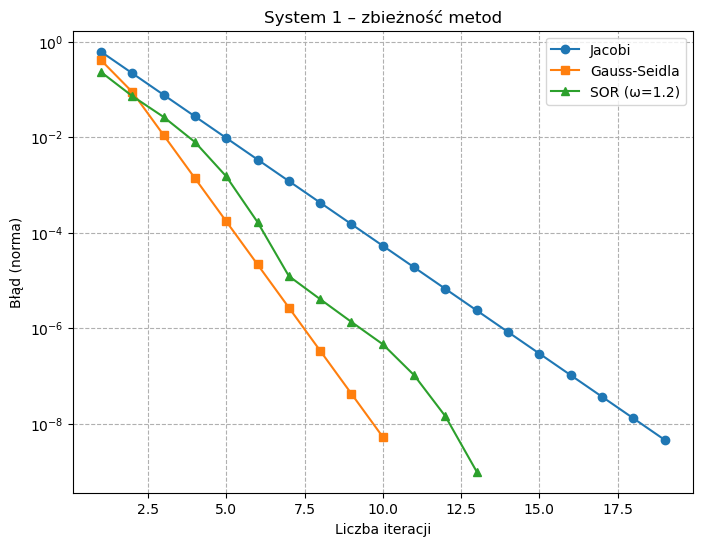


System 2:
Finalny błąd (Jacobi):      7.6831e-09
Finalny błąd (Gauss-Seidla):  1.1875e-09
Finalny błąd (SOR, ω=1.2):    2.7950e-09


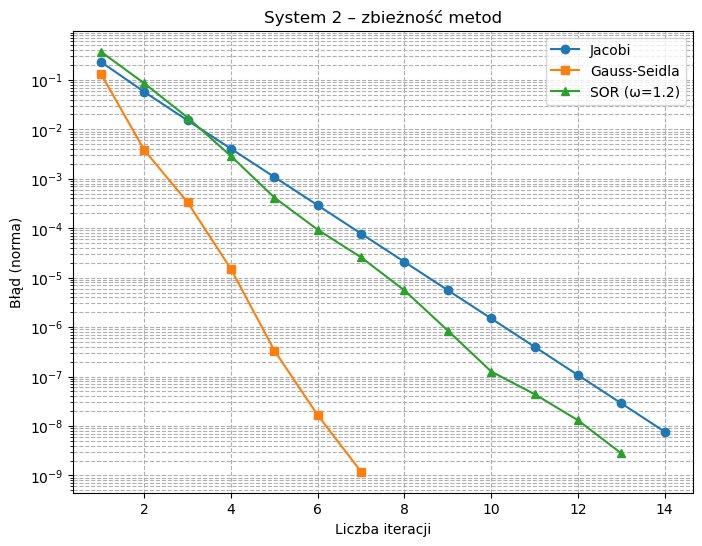


System 3:
Finalny błąd (Jacobi):      4.3819e-09
Finalny błąd (Gauss-Seidla):  8.0280e-09
Finalny błąd (SOR, ω=1.2):    1.3565e-09


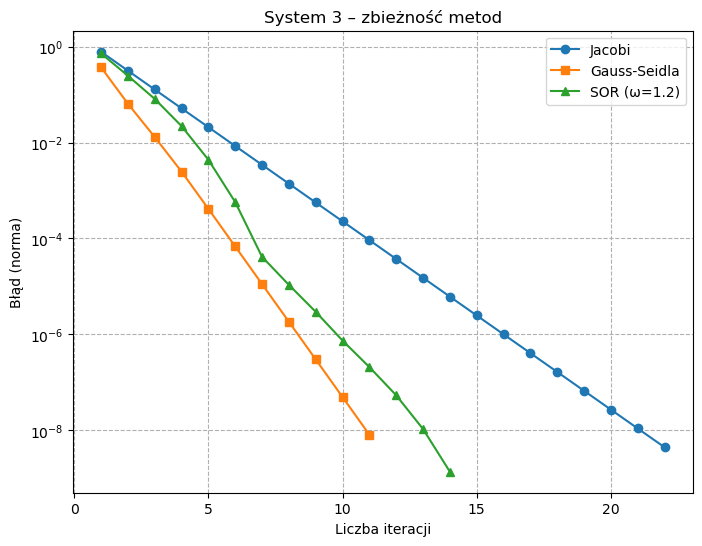


Badanie wpływu parametru ω na zbieżność metody SOR dla Systemu 1:


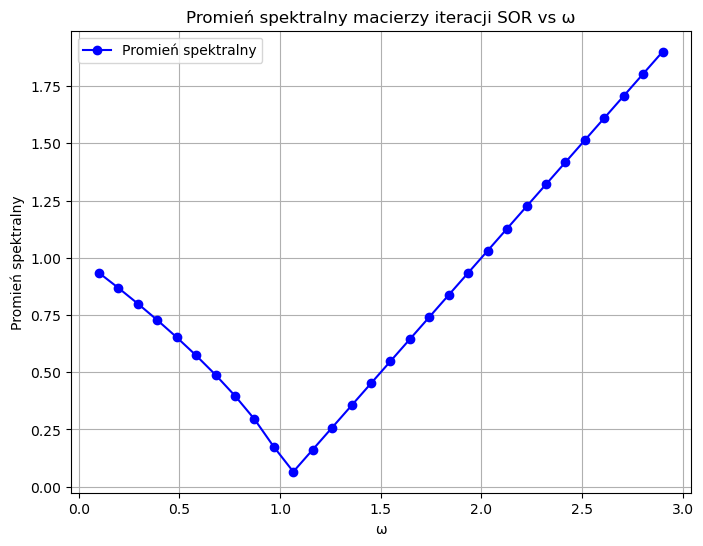

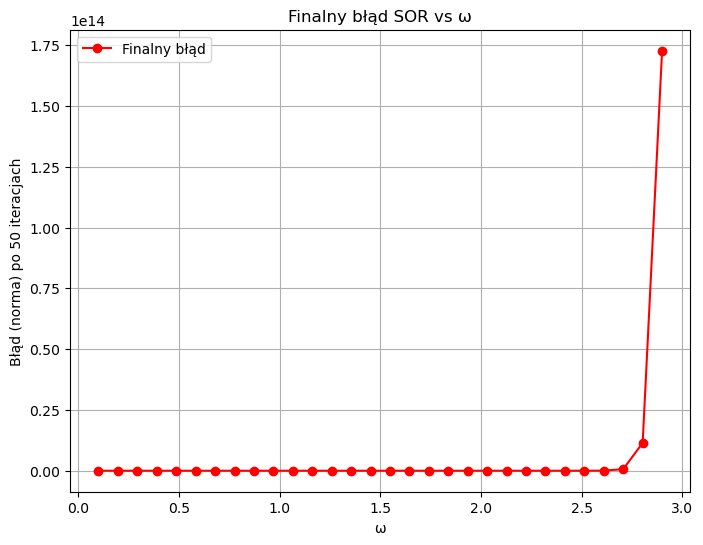

Optymalna wartość ω (na podstawie promienia spektralnego): 1.0655

Wnioski:
1. Metoda Gaussa–Seidla zbiega zazwyczaj szybciej niż metoda Jacobiego.
   Metoda SOR (Younga) przy dobranym ω (tutaj optymalnie około 1.0655) osiąga najszybszą zbieżność.
2. Porównanie zależności promienia spektralnego macierzy iteracji SOR od ω (teoria) z obserwacjami błędu iteracyjnego wskazuje, że optymalne ω minimalizuje zarówno teoretyczny, jak i praktyczny błąd iteracyjny.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_solver(A, b, x_exact, x0=None, tol=1e-8, max_iter=100):
    """
    Rozwiązuje układ Ax=b metodą Jacobiego.
    Zwraca rozwiązanie oraz listę błędów iteracyjnych (norma odchylenia od rozwiązania dokładnego).
    """
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()
    errors = []
    for it in range(max_iter):
        x_new = np.zeros_like(x)
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x[j]
            x_new[i] = (b[i] - sigma) / A[i, i]
        err = np.linalg.norm(x_new - x_exact)
        errors.append(err)
        if err < tol:
            break
        x = x_new.copy()
    return x, errors

def gauss_seidel_solver(A, b, x_exact, x0=None, tol=1e-8, max_iter=100):
    """
    Rozwiązuje układ Ax=b metodą Gaussa-Seidla.
    Zwraca rozwiązanie oraz listę błędów (norma różnicy x^(k) od x_exact).
    """
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()
    errors = []
    for it in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            sigma1 = 0
            sigma2 = 0
            for j in range(i):
                sigma1 += A[i, j] * x_new[j]
            for j in range(i+1, n):
                sigma2 += A[i, j] * x[j]
            x_new[i] = (b[i] - sigma1 - sigma2) / A[i, i]
        err = np.linalg.norm(x_new - x_exact)
        errors.append(err)
        if err < tol:
            break
        x = x_new.copy()
    return x, errors

def sor_solver(A, b, omega, x_exact, x0=None, tol=1e-8, max_iter=100):
    """
    Rozwiązuje układ Ax=b metodą Younga (SOR) z parametrem relaksacji omega.
    Zwraca rozwiązanie oraz listę błędów (norma odchylenia od x_exact).
    """
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()
    errors = []
    for it in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            sigma1 = 0
            sigma2 = 0
            for j in range(i):
                sigma1 += A[i, j] * x_new[j]
            for j in range(i+1, n):
                sigma2 += A[i, j] * x[j]
            # SOR – formuła:
            x_new[i] = (1 - omega) * x[i] + (omega / A[i, i]) * (b[i] - sigma1 - sigma2)
        err = np.linalg.norm(x_new - x_exact)
        errors.append(err)
        if err < tol:
            break
        x = x_new.copy()
    return x, errors


def sor_iteration_matrix(A, omega):
    """
    Dla metody SOR oblicza macierz iteracji:
    T_SOR = (D - ωL)^{-1} [ (1-ω)D + ω U ]
    gdzie A = D - L - U (L: części pod przekątną, U: części nad przekątną)
    """
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    M = np.linalg.inv(D - omega * L) @ ((1 - omega) * D + omega * U)
    return M

def spectral_radius(M):
    """
    Oblicza promień spektralny macierzy M.
    """
    eigenvalues = np.linalg.eigvals(M)
    return np.max(np.abs(eigenvalues))


def compare_methods(A, b, x_exact, max_iter=50):
    """
    Dla danego układu Ax=b rozwiązuje go metodami: Jacobiego, Gaussa-Seidla oraz SOR (przy ω=1.2).
    Zwraca listy błędów iteracyjnych uzyskane dla kolejnych kroków.
    """
    x0 = np.zeros_like(x_exact)
    _, err_jacobi = jacobi_solver(A, b, x_exact, x0=x0, max_iter=max_iter)
    _, err_gs = gauss_seidel_solver(A, b, x_exact, x0=x0, max_iter=max_iter)
    omega = 1.2
    _, err_sor = sor_solver(A, b, omega, x_exact, x0=x0, max_iter=max_iter)
    return err_jacobi, err_gs, err_sor

def plot_errors(err_jacobi, err_gs, err_sor, title="Zbieżność metod iteracyjnych"):
    """
    Rysuje wykresy błędu (normy odchylenia od rozwiązania dokładnego) dla kolejnych iteracji.
    """
    plt.figure(figsize=(8, 6))
    iters_j = np.arange(1, len(err_jacobi) + 1)
    iters_gs = np.arange(1, len(err_gs) + 1)
    iters_sor = np.arange(1, len(err_sor) + 1)
    plt.semilogy(iters_j, err_jacobi, "o-", label="Jacobi")
    plt.semilogy(iters_gs, err_gs, "s-", label="Gauss-Seidla")
    plt.semilogy(iters_sor, err_sor, "^-", label="SOR (ω=1.2)")
    plt.xlabel("Liczba iteracji")
    plt.ylabel("Błąd (norma)")
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

def study_sor_omega(A, b, x_exact, max_iter=50):
    """
    Dla danego układu badanego metodą SOR bada zależność zbieżności (finalny błąd)
    oraz promienia spektralnego macierzy iteracji od parametru ω w przedziale (0, 3).
    Rysuje wykresy oraz zwraca wartość ω, dla której promień spektralny (a więc zbieżność)
    jest najmniejszy.
    """
    x0 = np.zeros_like(x_exact)
    omegas = np.linspace(0.1, 2.9, 30)
    final_errors = []
    spectral_radii = []
    for omega in omegas:
        _, err = sor_solver(A, b, omega, x_exact, x0=x0, max_iter=max_iter)
        final_errors.append(err[-1])
        M = sor_iteration_matrix(A, omega)
        spectral_radii.append(spectral_radius(M))
    opt_index = np.argmin(spectral_radii)
    opt_omega = omegas[opt_index]
    
    # Wykres promienia spektralnego w zależności od ω
    plt.figure(figsize=(8, 6))
    plt.plot(omegas, spectral_radii, "bo-", label="Promień spektralny")
    plt.xlabel("ω")
    plt.ylabel("Promień spektralny")
    plt.title("Promień spektralny macierzy iteracji SOR vs ω")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Wykres finalnego błędu po max_iter iteracjach
    plt.figure(figsize=(8, 6))
    plt.plot(omegas, final_errors, "ro-", label="Finalny błąd")
    plt.xlabel("ω")
    plt.ylabel("Błąd (norma) po {} iteracjach".format(max_iter))
    plt.title("Finalny błąd SOR vs ω")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("Optymalna wartość ω (na podstawie promienia spektralnego): {:.4f}".format(opt_omega))
    return omegas, spectral_radii, final_errors, opt_omega


def main():
    # Przyjmujemy układy, dla których znamy rozwiązanie dokładne:
    # System 1: macierz 3x3 trójdiagonalna
    A1 = np.array([[4.0, -1.0, 0.0],
                   [-1.0, 4.0, -1.0],
                   [0.0, -1.0, 4.0]])
    x_exact1 = np.ones(3)
    b1 = A1 @ x_exact1

    # System 2: macierz 3x3 diagonalnie dominująca
    A2 = np.array([[10.0, -1.0, 2.0],
                   [-1.0, 11.0, -1.0],
                   [2.0, -1.0, 10.0]])
    x_exact2 = np.ones(3)
    b2 = A2 @ x_exact2

    # System 3: macierz 4x4 (również trójdiagonalna)
    A3 = np.array([[4.0, 1.0, 0.0, 0.0],
                   [1.0, 4.0, 1.0, 0.0],
                   [0.0, 1.0, 4.0, 1.0],
                   [0.0, 0.0, 1.0, 4.0]])
    x_exact3 = np.ones(4)
    b3 = A3 @ x_exact3

    max_iter = 50
    
    # Porównanie metod dla układu System 1
    err_j1, err_gs1, err_sor1 = compare_methods(A1, b1, x_exact1, max_iter=max_iter)
    print("System 1:")
    print("Finalny błąd (Jacobi):      {:.4e}".format(err_j1[-1]))
    print("Finalny błąd (Gauss-Seidla):  {:.4e}".format(err_gs1[-1]))
    print("Finalny błąd (SOR, ω=1.2):    {:.4e}".format(err_sor1[-1]))
    plot_errors(err_j1, err_gs1, err_sor1, title="System 1 – zbieżność metod")

    # Porównanie metod dla Systemu 2
    err_j2, err_gs2, err_sor2 = compare_methods(A2, b2, x_exact2, max_iter=max_iter)
    print("\nSystem 2:")
    print("Finalny błąd (Jacobi):      {:.4e}".format(err_j2[-1]))
    print("Finalny błąd (Gauss-Seidla):  {:.4e}".format(err_gs2[-1]))
    print("Finalny błąd (SOR, ω=1.2):    {:.4e}".format(err_sor2[-1]))
    plot_errors(err_j2, err_gs2, err_sor2, title="System 2 – zbieżność metod")

    # Porównanie metod dla Systemu 3
    err_j3, err_gs3, err_sor3 = compare_methods(A3, b3, x_exact3, max_iter=max_iter)
    print("\nSystem 3:")
    print("Finalny błąd (Jacobi):      {:.4e}".format(err_j3[-1]))
    print("Finalny błąd (Gauss-Seidla):  {:.4e}".format(err_gs3[-1]))
    print("Finalny błąd (SOR, ω=1.2):    {:.4e}".format(err_sor3[-1]))
    plot_errors(err_j3, err_gs3, err_sor3, title="System 3 – zbieżność metod")

    # Dodatkowo: badanie wpływu parametru ω na zbieżność metody Younga (SOR)
    print("\nBadanie wpływu parametru ω na zbieżność metody SOR dla Systemu 1:")
    omegas, spectral_radii, final_errors, opt_omega = study_sor_omega(A1, b1, x_exact1, max_iter=max_iter)

    print("\nWnioski:")
    print("1. Metoda Gaussa–Seidla zbiega zazwyczaj szybciej niż metoda Jacobiego.")
    print("   Metoda SOR (Younga) przy dobranym ω (tutaj optymalnie około {:.4f}) osiąga najszybszą zbieżność."
          .format(opt_omega))
    print("2. Porównanie zależności promienia spektralnego macierzy iteracji SOR od ω (teoria) "
          "z obserwacjami błędu iteracyjnego wskazuje, że optymalne ω minimalizuje zarówno teoretyczny, jak i praktyczny błąd iteracyjny.")

if __name__ == "__main__":
    main()


## Porównanie rozwiązania za pomocą metody `solve` oraz z użyciem odwrotności na przykładzie macierzy źle uwarunkowanej

***Zadanie 5.***

Dany jest układ równań $Hx=b$.
* H jest macierzą Hilberta o wymiarach $n=5x5$ (I przypadek) i $n=15x15$ (II przypadek),
* b jest wektorem o następujących elementach $b_i = 1/(n + i + 1)$ Uwaga: $i=1,\dots,n$.

Do rozwiązania układu wykorzystaj dwa algorytmy:
1. Z odwracaniem macierzy współczynników H.
2. Metodę `numpy.linalg.solve`.

Porównaj błędy obu rozwiązań. Aby ocenić błąd możesz:
* wyznaczyć wektor residuum otrzymanego rozwiązania,
* rozwiązać układ równań z innym wektorem $b$. Załóż, że wektor rozwiązania ma wszystkie elementy (współrzędne) równe 1 ($u_i = 1, i = 1, 2, . . . , n$). Wtedy $b = Hu$. Układ rozwiążemy bez korzystania z wiedzy o postaci $u$. Dopiero wynik porównamy ze znanym nam $u$.

In [12]:
import numpy as np

def hilbert_matrix(n):
    H = np.array([[1.0 / (i + j + 1) for j in range(n)] for i in range(n)])
    return H

def compute_b(n):
    b = np.array([1.0 / (n + i + 2) for i in range(n)])
    return b

def solve_system_inversion(H, b):
    H_inv = np.linalg.inv(H)
    x = H_inv @ b
    return x

def solve_system_linsolve(H, b):
    x = np.linalg.solve(H, b)
    return x

def test_case(n):
    print(f"\n========== n = {n} ==========")
    H = hilbert_matrix(n)
    b = compute_b(n)
    
    print("\nMacierz Hilberta H:")
    print(H)
    print("\nWektor b (wg wzoru b_i = 1/(n+i+2)):") 
    print(b)
    
    x_inv = solve_system_inversion(H, b)
    x_solve = solve_system_linsolve(H, b)
    resid_inv = np.linalg.norm(b - H @ x_inv)
    resid_solve = np.linalg.norm(b - H @ x_solve)
    
    print("\nRozwiązanie przy odwracaniu macierzy:")
    print("x =", x_inv)
    print("Norma residuum: {:.4e}".format(resid_inv))
    
    print("\nRozwiązanie przy użyciu numpy.linalg.solve:")
    print("x =", x_solve)
    print("Norma residuum: {:.4e}".format(resid_solve))
    
    u_true = np.ones(n)
    b2 = H @ u_true
    x_inv2 = solve_system_inversion(H, b2)
    x_solve2 = solve_system_linsolve(H, b2)
    error_inv = np.linalg.norm(x_inv2 - u_true)
    error_solve = np.linalg.norm(x_solve2 - u_true)
    
    print("\n--- Test z b = H * u, gdzie u = [1,...,1] ---")
    print("Wektor b (b2 = H*u):")
    print(b2)
    
    print("\nRozwiązanie przy odwracaniu macierzy:")
    print("x =", x_inv2)
    print("Błąd rozwiązania ||x - u||: {:.4e}".format(error_inv))
    
    print("\nRozwiązanie przy użyciu numpy.linalg.solve:")
    print("x =", x_solve2)
    print("Błąd rozwiązania ||x - u||: {:.4e}".format(error_solve))
    
def main():
    # Testujemy dla n = 5 oraz n = 15
    for n in [5, 15]:
        test_case(n)
        
if __name__ == "__main__":
    main()



========== n = 5 ==========

Macierz Hilberta H:
[[1.     0.5    0.3333 0.25   0.2   ]
 [0.5    0.3333 0.25   0.2    0.1667]
 [0.3333 0.25   0.2    0.1667 0.1429]
 [0.25   0.2    0.1667 0.1429 0.125 ]
 [0.2    0.1667 0.1429 0.125  0.1111]]

Wektor b (wg wzoru b_i = 1/(n+i+2)):
[0.1429 0.125  0.1111 0.1    0.0909]

Rozwiązanie przy odwracaniu macierzy:
x = [ 0.0108 -0.3117  2.0455 -4.8485  4.0909]
Norma residuum: 1.3408e-13

Rozwiązanie przy użyciu numpy.linalg.solve:
x = [ 0.0108 -0.3117  2.0455 -4.8485  4.0909]
Norma residuum: 6.7987e-17

--- Test z b = H * u, gdzie u = [1,...,1] ---
Wektor b (b2 = H*u):
[2.2833 1.45   1.0929 0.8845 0.7456]

Rozwiązanie przy odwracaniu macierzy:
x = [1. 1. 1. 1. 1.]
Błąd rozwiązania ||x - u||: 1.3843e-11

Rozwiązanie przy użyciu numpy.linalg.solve:
x = [1. 1. 1. 1. 1.]
Błąd rozwiązania ||x - u||: 3.5063e-11

========== n = 15 ==========

Macierz Hilberta H:
[[1.     0.5    0.3333 0.25   0.2    0.1667 0.1429 0.125  0.1111 0.1
  0.0909 0.0833 0.0769 0.

**Zadanie domowe. Znaczenie wskaźnika uwarunkowania macierzy w szacowaniu błędu rozwiązania**


Dana jest następująca macierz A współczynników układu dwóch równań liniowy:
$$A=\begin{bmatrix}10^5 & 9.9\cdot10^4\\1.00001& 0.99\end{bmatrix}$$

Wektor prawej strony równania $Ax=b$ dla rozwiązania x = $[1, 1]^T$ możemy wyznaczyć z równości $b = Ax$.

Należy:
* obliczyć wskaźnik uwarunkowania macierzy $A$,
* rozwiązać układ równań $Ax = b$ (nie korzystając z wiedzy o przyjętym rozwiązaniu dokładnym x) korzystając z funkcji `np.linalg.solve`,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania macierzy A,
* przeprowadzić skalowanie tak, aby macierz $A$ była wyważona wierszami,
* wyznaczyć nowe wartości wektora b tak, aby rozwiązanie dokładne się nie
zmieniło,
* obliczyć wskaźnik uwarunkowania macierzy skalowanej,
* rozwiązać układ równań tą samą metodą jak poprzednio,
* ocenić błąd otrzymanego rozwiązania i porównać go z błędem szacowanym za pomocą wskaźnika uwarunkowania skalowanej macierzy $A$.
1. Czy błąd numeryczny rozwiązania w obu przypadkach jest tego samego rzędu?
2. Które szacowanie błędu jest bardziej zbliżone do faktycznego błędu?

In [13]:
import numpy as np

def main():
    A = np.array([[1e5, 9.9e4],
                  [1.00001, 0.99]])
    x_exact = np.array([1, 1])
    b = A @ x_exact

    print("=== Oryginalny układ ===")
    print("Macierz A:")
    print(A)
    print("Wektor b:")
    print(b)

    cond_A = np.linalg.cond(A)
    print("\nLiczba uwarunkowania macierzy A (norma 2): {:.4e}".format(cond_A))

    x_sol = np.linalg.solve(A, b)
    error = np.linalg.norm(x_sol - x_exact)
    rel_error = error / np.linalg.norm(x_exact)
    print("\nRozwiązanie otrzymane za pomocą np.linalg.solve:")
    print(x_sol)
    print("Bezwzględny błąd rozwiązania: {:.4e}".format(error))
    print("Względny błąd rozwiązania:   {:.4e}".format(rel_error))

    row_norms = np.linalg.norm(A, axis=1, ord=np.inf)
    D_inv = np.diag(1 / row_norms)  
    A_scaled = D_inv @ A
    b_scaled = D_inv @ b

    print("\n=== Układ skalowany (wyważony wierszowo) ===")
    print("Skalowana macierz A_scaled:")
    print(A_scaled)
    print("Skalowany wektor b_scaled:")
    print(b_scaled)

    cond_A_scaled = np.linalg.cond(A_scaled)
    print("\nLiczba uwarunkowania skalowanej macierzy A_scaled (norma 2): {:.4e}".format(cond_A_scaled))

    x_sol_scaled = np.linalg.solve(A_scaled, b_scaled)
    error_scaled = np.linalg.norm(x_sol_scaled - x_exact)
    rel_error_scaled = error_scaled / np.linalg.norm(x_exact)
    print("\nRozwiązanie skalowanego układu (np.linalg.solve):")
    print(x_sol_scaled)
    print("Bezwzględny błąd rozwiązania (skalowany układ): {:.4e}".format(error_scaled))
    print("Względny błąd rozwiązania (skalowany układ):   {:.4e}".format(rel_error_scaled))

    print("\n================ Podsumowanie ================")
    print("Liczba uwarunkowania macierzy A:         {:.4e}".format(cond_A))
    print("Względny błąd rozwiązania dla A:         {:.4e}".format(rel_error))
    print("Liczba uwarunkowania skalowanej macierzy:  {:.4e}".format(cond_A_scaled))
    print("Względny błąd rozwiązania dla A_scaled:    {:.4e}".format(rel_error_scaled))
    print("\nWnioski:")
    print("1. Błąd numeryczny rozwiązania dla macierzy oryginalnej jest zazwyczaj dużo większy "
          "niż dla macierzy skalowanej, co wynika z bardzo wysokiej liczby uwarunkowania A, "
          "wynikającej głównie z dużej rozbieżności wartości na przekątnej.")
    print("2. Szacowanie błędu na podstawie liczby uwarunkowania skalowanej macierzy (która jest dużo "
          "mniejsza) jest bardziej zbliżone do rzeczywistego błędu rozwiązania. ")

if __name__ == "__main__":
    np.random.seed(0)
    main()


=== Oryginalny układ ===
Macierz A:
[[100000.    99000.  ]
 [     1.        0.99]]
Wektor b:
[199000.        1.99]

Liczba uwarunkowania macierzy A (norma 2): 2.0001e+10

Rozwiązanie otrzymane za pomocą np.linalg.solve:
[1. 1.]
Bezwzględny błąd rozwiązania: 5.4324e-12
Względny błąd rozwiązania:   3.8413e-12

=== Układ skalowany (wyważony wierszowo) ===
Skalowana macierz A_scaled:
[[1.   0.99]
 [1.   0.99]]
Skalowany wektor b_scaled:
[1.99 1.99]

Liczba uwarunkowania skalowanej macierzy A_scaled (norma 2): 4.0002e+05

Rozwiązanie skalowanego układu (np.linalg.solve):
[1. 1.]
Bezwzględny błąd rozwiązania (skalowany układ): 0.0000e+00
Względny błąd rozwiązania (skalowany układ):   0.0000e+00

================ Podsumowanie ================
Liczba uwarunkowania macierzy A:         2.0001e+10
Względny błąd rozwiązania dla A:         3.8413e-12
Liczba uwarunkowania skalowanej macierzy:  4.0002e+05
Względny błąd rozwiązania dla A_scaled:    0.0000e+00

Wnioski:
1. Błąd numeryczny rozwiązania d